<a href="https://colab.research.google.com/github/Baharsh01/Machine_Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [7]:
n = 1000
x = np.random.normal(3, 5, size = n)
y = -15 * x + 20 + np.random.normal(0, 3, size=n)

In [8]:
X = np.sum(x)
Y = np.sum(y)
b1 = (n * np.dot(x,y) - X*Y)/(n * np.dot(x,x) - X**2)
b0 = (Y - b1 * X)/n
b0, b1 = round(b0, 2), round(b1 , 2)
print(f"y = {b0} + {b1} * x")

y = 20.08 + -15.02 * x


In [11]:
def MSE_loss(b0, b1, x, y):
  pred = b0 + b1 * x
  loss = np.sum((pred - y)**2 / len(y))
  return loss

In [12]:
b0_vals = np.linspace(0, 40, 100)
b1_vals = np.linspace(-30, 0, 100)

In [13]:
Z = np.zeros((len(b0_vals), len(b1_vals)))
for i in range(len(b0_vals)):
  for j in range(len(b1_vals)):
    Z[i, j] = np.log(MSE_loss(b0_vals[i], b1_vals[j], x, y))

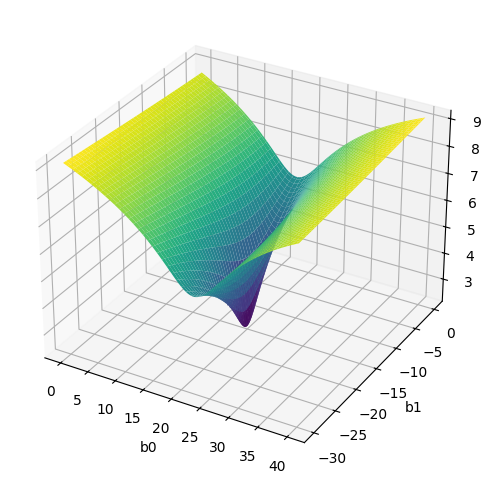

In [18]:
### 3D plot
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111 , projection = '3d')
B0 ,B1 = np.meshgrid(b0_vals, b1_vals)
ax.plot_surface(B0, B1, Z, cmap='viridis')

ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('loss')
plt.show()

# **Multiple Linear Regression**

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

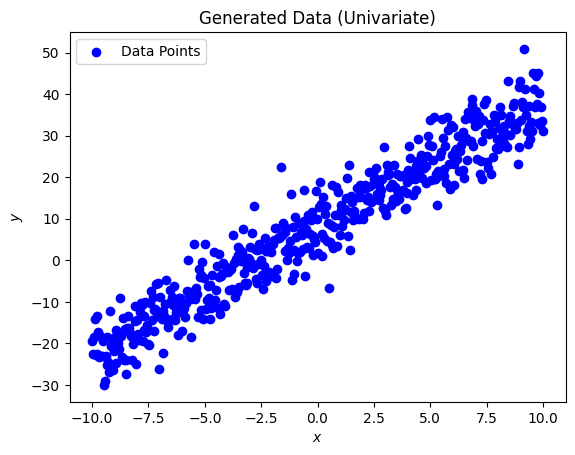

In [27]:
X, y = generate_data(n=500, noise=5.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [28]:
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")

Parameters (w): 
w_1 = 3.02, w_0 = 8.03


In [ ]:
####افزایش سایز دیتا باعث افزایش دقت مدل می‌شود###

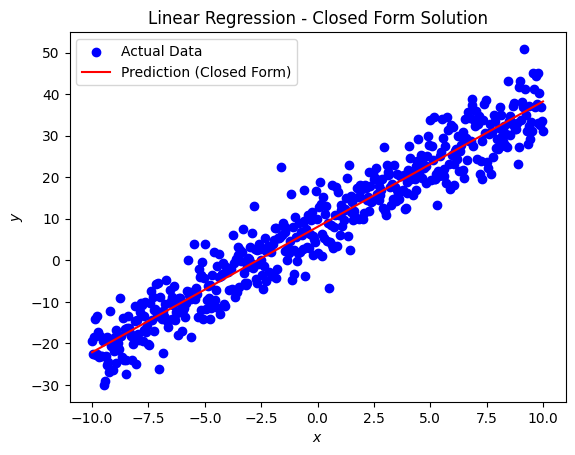

In [29]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()